In [280]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_auc_score,roc_curve
import matplotlib.pyplot as plt

In [281]:
import warnings
warnings.filterwarnings('ignore')

In [282]:
from google.colab import files
uploaded=files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (18).csv


In [283]:
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [284]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,EVENT
count,299.000000,292.000000,299.000000,292.000000,299.000000,299.000000,299.000000,291.000000,299.000000,299.000000,294.000000,299.000000,299.00000
mean,60.833893,0.428082,581.839465,0.424658,38.421405,0.351171,263358.029264,1.395052,136.625418,0.648829,0.312925,130.260870,0.32107
std,11.894809,0.495650,970.287881,0.495139,13.128547,0.478136,97804.236869,1.046494,4.412477,0.478136,0.464475,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,10.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.900000,134.000000,0.000000,0.000000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,1.000000,0.000000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.400000,140.000000,1.000000,1.000000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,101.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.00000


In [285]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,industry_type,EVENT
0,75.0,0.0,582,0.0,20,1,265000.00,1.9,130,1,0.0,4,Finance,1
1,55.0,0.0,7861,0.0,38,0,263358.03,1.1,136,1,0.0,6,Other,1
2,65.0,0.0,146,0.0,20,0,162000.00,1.3,129,1,1.0,7,Banking,1
3,50.0,1.0,111,0.0,20,0,210000.00,1.9,137,1,0.0,7,Banking,1
4,65.0,1.0,160,1.0,20,0,327000.00,2.7,116,0,0.0,8,Banking,1


In [286]:
#removing the string column
rem=['industry_type']
df.drop(rem,axis=1,inplace =True)
df


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,EVENT
0,75.0,0.0,582,0.0,20,1,265000.00,1.9,130,1,0.0,4,1
1,55.0,0.0,7861,0.0,38,0,263358.03,1.1,136,1,0.0,6,1
2,65.0,0.0,146,0.0,20,0,162000.00,1.3,129,1,1.0,7,1
3,50.0,1.0,111,0.0,20,0,210000.00,1.9,137,1,0.0,7,1
4,65.0,1.0,160,1.0,20,0,327000.00,2.7,116,0,0.0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0.0,61,1.0,38,1,155000.00,1.1,143,1,1.0,270,0
295,55.0,0.0,1820,0.0,38,0,270000.00,1.2,139,0,0.0,271,0
296,45.0,0.0,2060,1.0,60,0,742000.00,0.8,138,0,0.0,278,0
297,45.0,0.0,2413,0.0,38,0,140000.00,1.4,140,1,1.0,280,0


In [287]:
df.dropna()
#np.isnan(df.any()) #and gets False
#np.any(np.isnan(df))
#cleaning the unwanted values from the data
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

data=clean_dataset(df)
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,EVENT
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0,1.0
1,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0,1.0
2,65.0,0.0,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,1.0,7.0,1.0
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,1.9,137.0,1.0,0.0,7.0,1.0
4,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,2.7,116.0,0.0,0.0,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0.0,61.0,1.0,38.0,1.0,155000.00,1.1,143.0,1.0,1.0,270.0,0.0
295,55.0,0.0,1820.0,0.0,38.0,0.0,270000.00,1.2,139.0,0.0,0.0,271.0,0.0
296,45.0,0.0,2060.0,1.0,60.0,0.0,742000.00,0.8,138.0,0.0,0.0,278.0,0.0
297,45.0,0.0,2413.0,0.0,38.0,0.0,140000.00,1.4,140.0,1.0,1.0,280.0,0.0


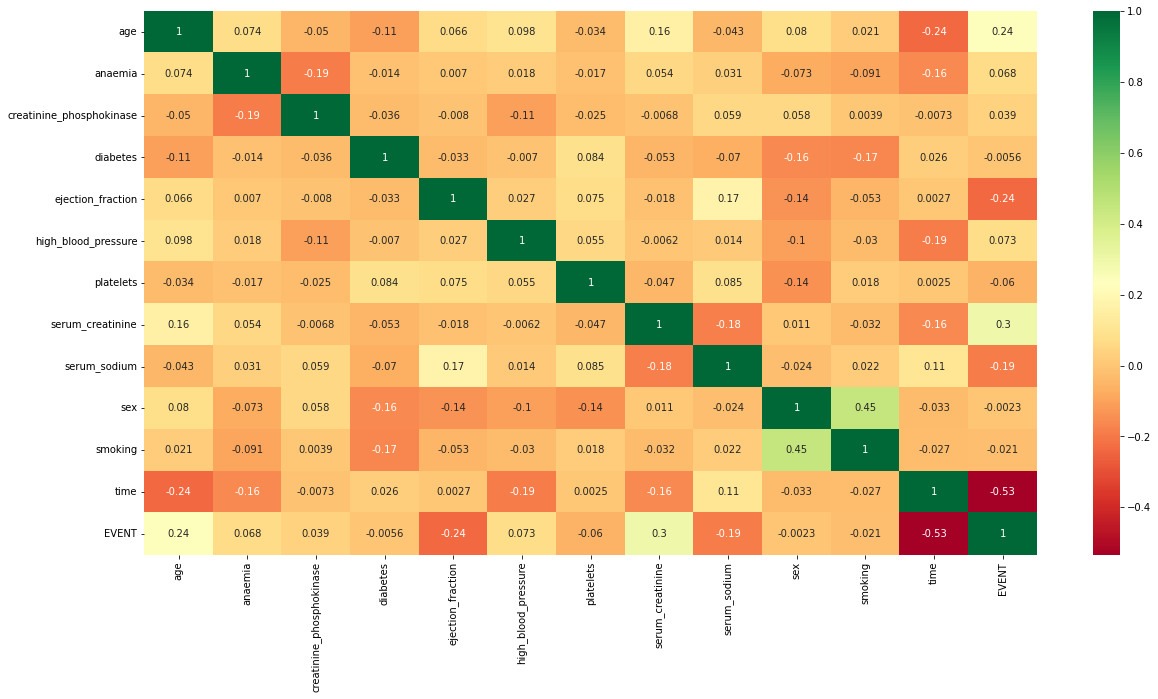

In [288]:
%matplotlib inline
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#corelation plot gives the intituitive undeastnading of the feature relation
#we can select the feature according to the correlation matrix
#feature should be independent

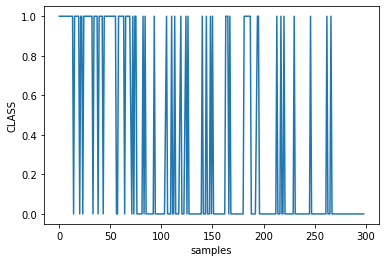

0.0    185
1.0     89
Name: EVENT, dtype: int64

In [289]:
X= data.drop(['EVENT'],axis = 1)#.to_numpy
X=np.array(X)
y = data['EVENT']#.to_numpy
#target variable distribution
plt.plot(y)
plt.xlabel('samples')
plt.ylabel('CLASS')
plt.show()
y.value_counts()
#data is imbalence 

In [290]:
#### Train Test Split
from sklearn.model_selection import train_test_split
### fit the randomized model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
#rf = RandomForestClassifier(criterion="gini", n_estimators=20, max_features=10, n_jobs=2)
rf=RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, min_samples_split=5, min_samples_leaf=1,min_weight_fraction_leaf=0.0,
                                      max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                                      bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False,
                                      class_weight=None, ccp_alpha=0.0, max_samples=None)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)




[[36  2]
 [ 3 14]]
Accuracy Score 0.9090909090909091
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94        38
         1.0       0.88      0.82      0.85        17

    accuracy                           0.91        55
   macro avg       0.90      0.89      0.89        55
weighted avg       0.91      0.91      0.91        55

ROC_Score: 0.9597523219814242


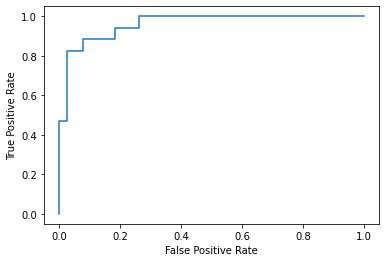

In [291]:
#calculating the evaluation matrix
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_auc_score
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred))
probs = rf.predict_proba(X_test)[::,1]
preds = probs
roc_auc=roc_auc_score(y_test,preds)
print("ROC_Score:",roc_auc)
#define metrics

fpr, tpr, _ = roc_curve(y_test,  preds)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#plot_roc_curve(y_test, preds)
#plt.show()

In [292]:
#random forest giving very good accuracy
#classification report precision and recall is also very good
    

In [293]:
#we can try other machine learning algorithms to campare the accuracy
#data is imbalence so we can try oversamplng techniques to remove